In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Reveal_EEO1_for_2016.csv', delimiter=',')

In [83]:
plt.style.use('ggplot’)

SyntaxError: EOL while scanning string literal (<ipython-input-83-ce2356166e03>, line 1)

In [3]:
df.head()


,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0


In [30]:
df['count']


0         0.0
1         1.0
2         7.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        8.0
11        NaN
12        0.0
13        1.0
14        5.0
15        0.0
16        0.0
17        5.0
18        0.0
19        0.0
20        0.0
21        0.0
22       11.0
23        NaN
24        9.0
25       30.0
26       61.0
27        0.0
28        0.0
29        2.0
        ...  
3930      0.0
3931      0.0
3932      0.0
3933      0.0
3934      0.0
3935      0.0
3936      0.0
3937      0.0
3938      0.0
3939      1.0
3940      0.0
3941      0.0
3942      0.0
3943      0.0
3944      0.0
3945      0.0
3946      1.0
3947      0.0
3948     34.0
3949     39.0
3950    129.0
3951     27.0
3952     52.0
3953      6.0
3954     18.0
3955    155.0
3956      0.0
3957      0.0
3958    460.0
3959    352.0
Name: count, Length: 3960, dtype: float64

In [29]:
df['count'] = pd.to_numeric(df['count'], errors='coerce')

In [31]:
df_group_race['count'].sum()

race
American_Indian_Alaskan_Native            3530.0
Asian                                   276530.0
Black_or_African_American                52813.0
Latino                                   75442.0
Native_Hawaiian_or_Pacific_Islander       3165.0
Overall_totals                         1045284.0
Two_or_more_races                        16647.0
White                                   617157.0
Name: count, dtype: float64

In [6]:
df_group_race = df.groupby(df.race)


In [42]:
df_race_count = df_group_race['count'].sum()

In [46]:
df_race_count = df_race_count.drop(['Overall_totals'])

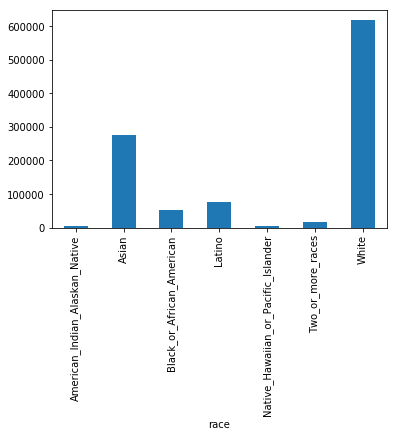

In [47]:

df_race_count.plot(kind='bar')

In [48]:
df_group_gender = df.groupby(df.gender)
df_gender_count = df_group_gender['count'].sum()

In [49]:
df_gender_count

gender
female    315364.0
male      729920.0
Name: count, dtype: float64

In [50]:
df_group_cat_race = df.groupby(['job_category', 'race'])

In [61]:
df_job_race_sum =  df_group_cat_race.sum()
df_job_race_sum = df_job_race_sum.drop(['year'], axis=1)
df_job_race_sum

count
job_category                      race                                         
Administrative support            American_Indian_Alaskan_Native          105.0
                                  Asian                                  2146.0
                                  Black_or_African_American              2041.0
                                  Latino                                 2685.0
                                  Native_Hawaiian_or_Pacific_Islander     103.0
                                  Overall_totals                        18792.0
                                  Two_or_more_races                       526.0
                                  White                                 11186.0
Craft workers                     American_Indian_Alaskan_Native           11.0
                                  Asian                                    40.0
                                  Black_or_African_American                18.0
                                  Latino                                   74.0
                                  Native_Hawaiian_or_Pacific_Islander       1.0
                                  Overall_totals                          543.0
                                  Two_or_more_races                         7.0
                                  White                                   392.0
Executive/Senior officials & Mgrs American_Indian_Alaskan_Native            9.0
                                  Asian                                   710.0
                                  Black_or_African_American                55.0
                                  Latino                                  101.0
                                  Native_Hawaiian_or_Pacific_Islander       5.0
                                  Overall_totals                         3536.0
                                  Two_or_more_races                        36.0
                                  White                                  2620.0
First/Mid officials & Mgrs        American_Indian_Alaskan_Native          136.0
                                  Asian                                 12542.0
                                  Black_or_African_American              1398.0
                                  Latino                                 2690.0
                                  Native_Hawaiian_or_Pacific_Islander     116.0
                                  Overall_totals                        52036.0
...                                                                         ...
Technicians                       Black_or_African_American              3843.0
                                  Latino                                 4211.0
                                  Native_Hawaiian_or_Pacific_Islander     168.0
                                  Overall_totals                        32057.0
                                  Two_or_more_races                       856.0
                                  White                                 19882.0
Totals                            American_Indian_Alaskan_Native         1165.0
                                  Asian                                 96171.0
                                  Black_or_African_American             17832.0
                                  Latino                                25767.0
                                  Native_Hawaiian_or_Pacific_Islander    1146.0
                                  Overall_totals                       354964.0
                                  Two_or_more_races                      5871.0
                                  White                                207012.0
laborers and helpers              American_Indian_Alaskan_Native            0.0
                                  Asian                                    39.0
                                  Black_or_African_American                36.0
                                  Latino                                  

In [71]:
jobs = df['job_category'].unique()
jobs

array(['Executive/Senior officials & Mgrs', 'First/Mid officials & Mgrs',
       'Professionals', 'Technicians', 'Sales workers',
       'Administrative support', 'Craft workers', 'operatives',
       'laborers and helpers', 'Service workers', 'Totals',
       'Previous_totals'], dtype=object)

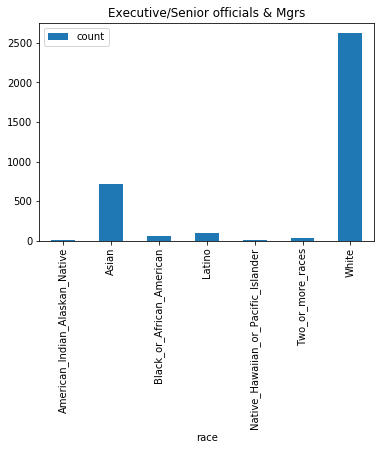

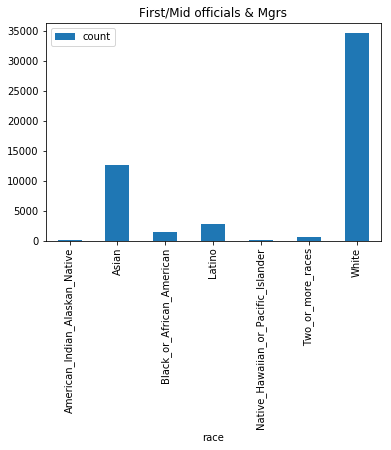

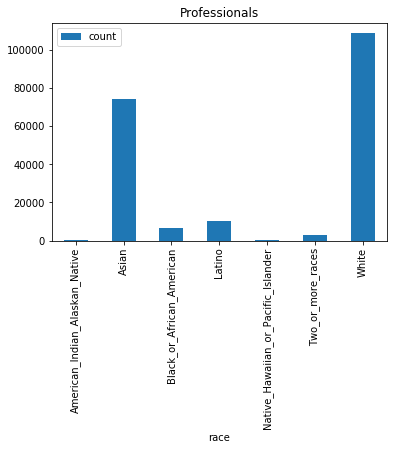

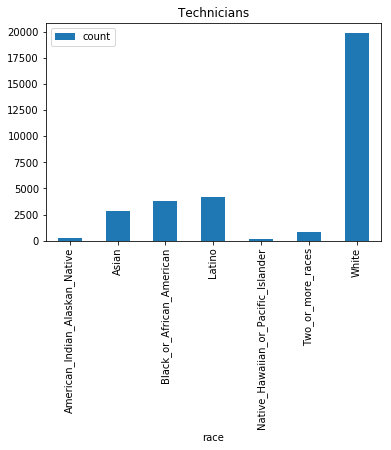

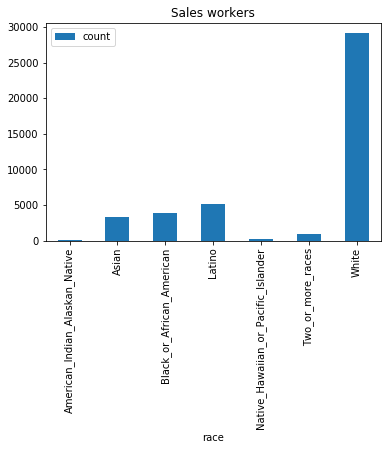

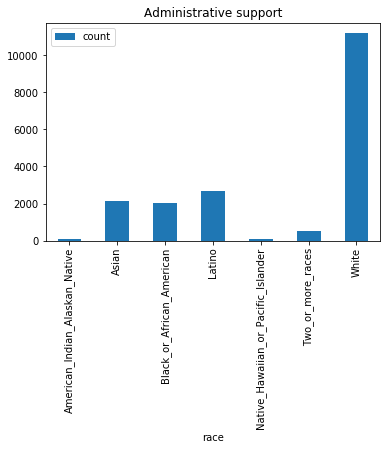

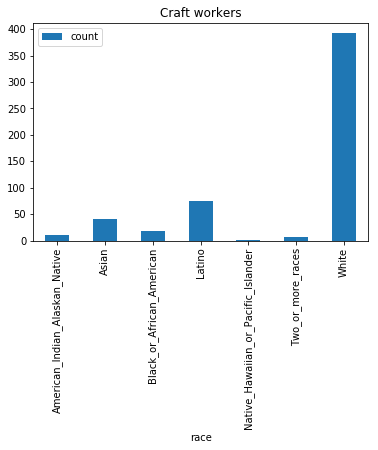

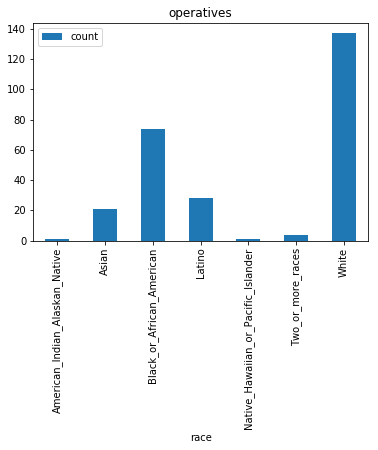

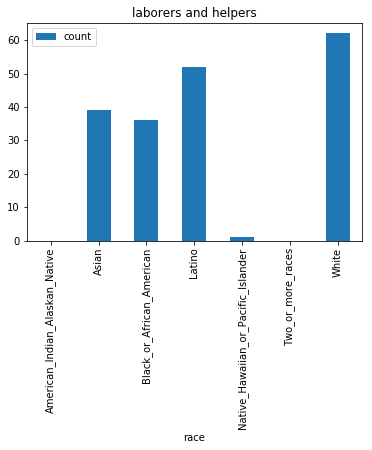

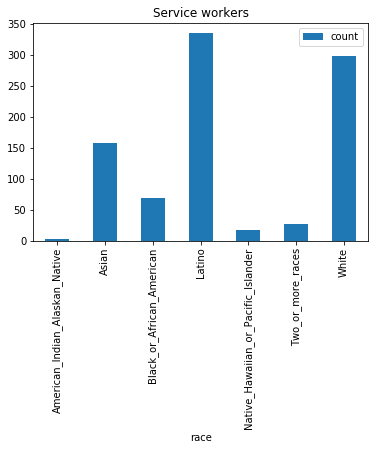

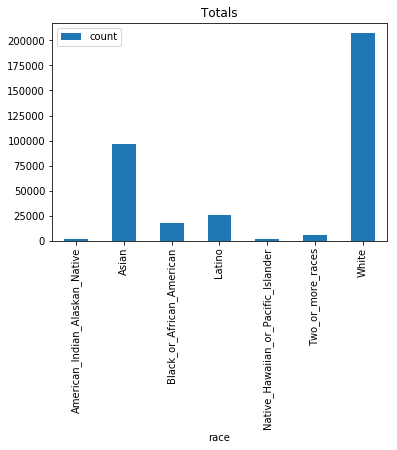

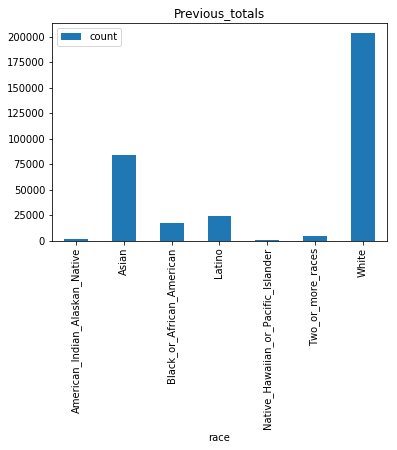

In [80]:
fig, axs = plt.subplots(3,4)

for i, job in enumerate(jobs):
    df_plot = df_job_race_sum.xs(job).drop(['Overall_totals'])
    df_plot.plot(kind='bar', title=job)

In [84]:
len(jobs)

12